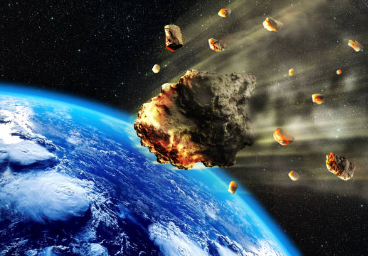

#### What is an Asteroid?

Asteroids are small, rocky objects that orbit the Sun. Although asteroids orbit the Sun like planets, they are much smaller than planets.Asteroids hang out in other places, too. For example, some asteroids are found in the orbital path of planets. This means that the asteroid and the planet follow the same path around the sun. Earth and a few other planets have asteroids like this.

#### Where did asteroids come from?

Asteroids are left over from the formation of our solar system. Our solar system began about 4.6 billion years ago when a big cloud of gas and dust collapsed. When this happened, most of the material fell to the center of the cloud and formed the sun.

Some of the condensing dust in the cloud became planets. The objects in the asteroid belt never had the chance to be incorporated into planets. They are leftovers from that time long ago when planets formed.

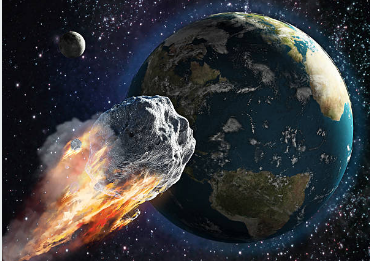

In [1]:
#importing important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import roc_curve,auc

In [3]:
df=pd.read_csv("neo.csv")

/kaggle/input/nasa-nearest-earth-objects/neo.csv

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


No any column in data has Null Values.

In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
#Checking for missing value

df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

Data has no missing value.

In [7]:
#First 10 rows of the data

df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [8]:
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


It is clear from the dataset that orbiting_body and sentry_object have only one unique value, so they may be dropped from the table.

In [9]:
df.drop(["orbiting_body","sentry_object"],axis=1,inplace=True)

In [10]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


We can see that id and name each only have 27,423 unique values. This means that the same asteroid is measured multiple times.
Let's take a look at one of these asteroids to see what changes with each record:

In [11]:
df[df['id']==2512244]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
2,2512244,512244 (2015 YE18),0.72203,1.614507,114258.692129,4.979872e+07,17.83,False
34775,2512244,512244 (2015 YE18),0.72203,1.614507,108921.901046,5.515533e+07,17.83,False
38935,2512244,512244 (2015 YE18),0.72203,1.614507,83443.665419,3.847137e+07,17.83,False
50557,2512244,512244 (2015 YE18),0.72203,1.614507,66703.445868,4.261211e+07,17.83,False
56163,2512244,512244 (2015 YE18),0.72203,1.614507,92356.589391,2.215708e+07,17.83,False
59222,2512244,512244 (2015 YE18),0.72203,1.614507,75905.795982,6.279431e+07,17.83,False
75891,2512244,512244 (2015 YE18),0.72203,1.614507,125222.235862,6.461806e+07,17.83,False


From above table, it appears that relative_velocity and miss_distance change with each observation of the same asteriod. 
A lagre majority of time, the classification of hazardous does not change with each observation.

In [12]:
print(df["hazardous"].value_counts()/len(df))

False    0.902682
True     0.097318
Name: hazardous, dtype: float64


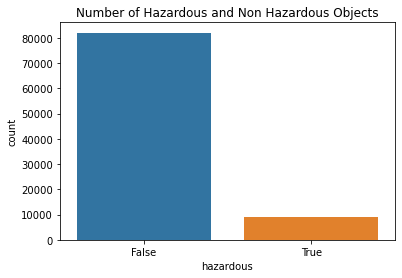

In [13]:
sns.countplot(x="hazardous",data=df)
plt.title("Number of Hazardous and Non Hazardous Objects")
plt.show()

In [14]:
#Now we will see coorelation between variables

df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


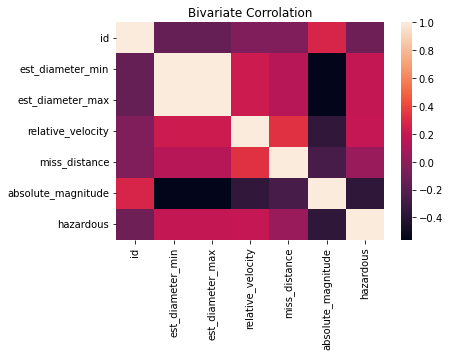

In [15]:
sns.heatmap(df.corr())
plt.title("Bivariate Corrolation")
plt.show()

It is clear from corelation table that est_diameter_min and est_diameter_max are perfectly correlated. So we drop one of these feature.

In [16]:
df.drop(["est_diameter_min"],axis=1,inplace=True)

Let's extract the year from the name variable to see if there is any pattern with the year the asteroid was discovered.

In [17]:
#Extracting year from name to see later on whether we could have a paatern

df[['drop','work']]=df.name.str.split('(',expand=True)

In [18]:
# Dropping the unnecessary extra column we made

df.drop(columns='drop',inplace=True)

In [19]:
def year_extract(x):
    return x.strip()[0:x.strip().index(' ')]
df['year']=df['work'].apply(year_extract)

In [20]:
df["year"].unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', 'A911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '6743', '1983',
       'A898', '1949', '1974', '1932', '1972', '4788', '6344', '1968',
       '1981', '1979', 'A924', '1947', '1959', '1975', '1929', 'A/2019',
       '1963'], dtype=object)

In [21]:
# Change abnormal years to the correct year

df.loc[df.year=='A911','year']='1911'
df.loc[df.year=='6743','year']='1960'
df.loc[df.year=='A898','year']='1898'
df.loc[df.year=='6344','year']='1960'
df.loc[df.year=='A924','year']='1924'
df.loc[df.year=='A/2019','year']='2019'
df.loc[df.year=='4788','year']='1960'

In [22]:
df.year.unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', '1911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '1983', '1898',
       '1949', '1974', '1932', '1972', '1968', '1981', '1979', '1924',
       '1947', '1959', '1975', '1929', '1963'], dtype=object)

In [23]:
#Converting year into int type to check distribution
df.year=df.year.astype(int)

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


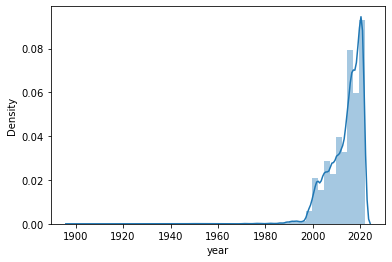

In [24]:
sns.distplot(df.year)
plt.show()

In [25]:
# Dropping the extra column we made
df.drop(columns=['work'],inplace=True)

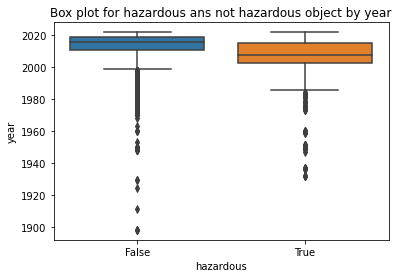

In [26]:
sns.boxplot(x='hazardous',y='year',data=df)
plt.title('Box plot for hazardous ans not hazardous object by year')
plt.show()

## Univariant Analysis

In [27]:
num_cols= ['est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude','year']

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

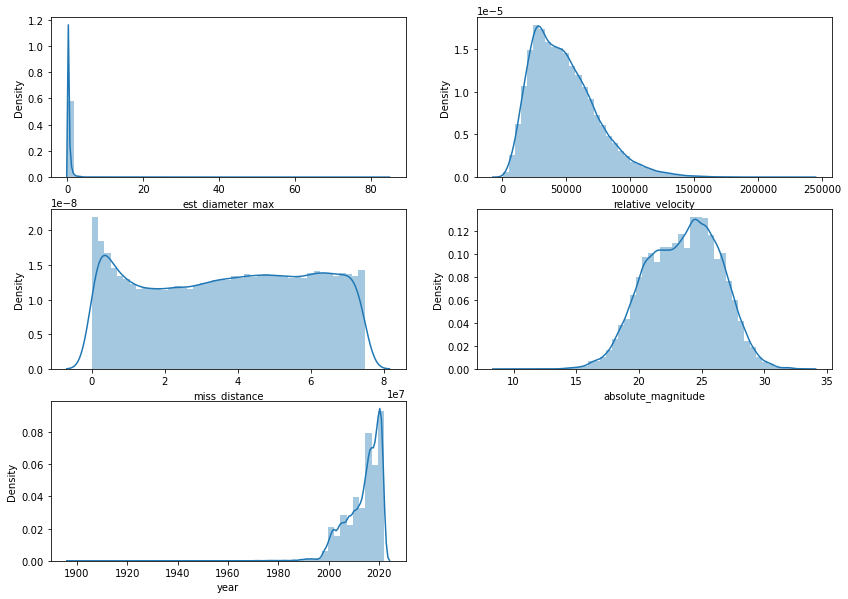

In [28]:
rows=3
cols=2
count=1
plt.rcParams['figure.figsize']=[14,10]
for i in num_cols:
    plt.subplot(rows,cols,count)
    sns.distplot(df[i])
    count=count+1

plt.show()

## Bivariate Analysis

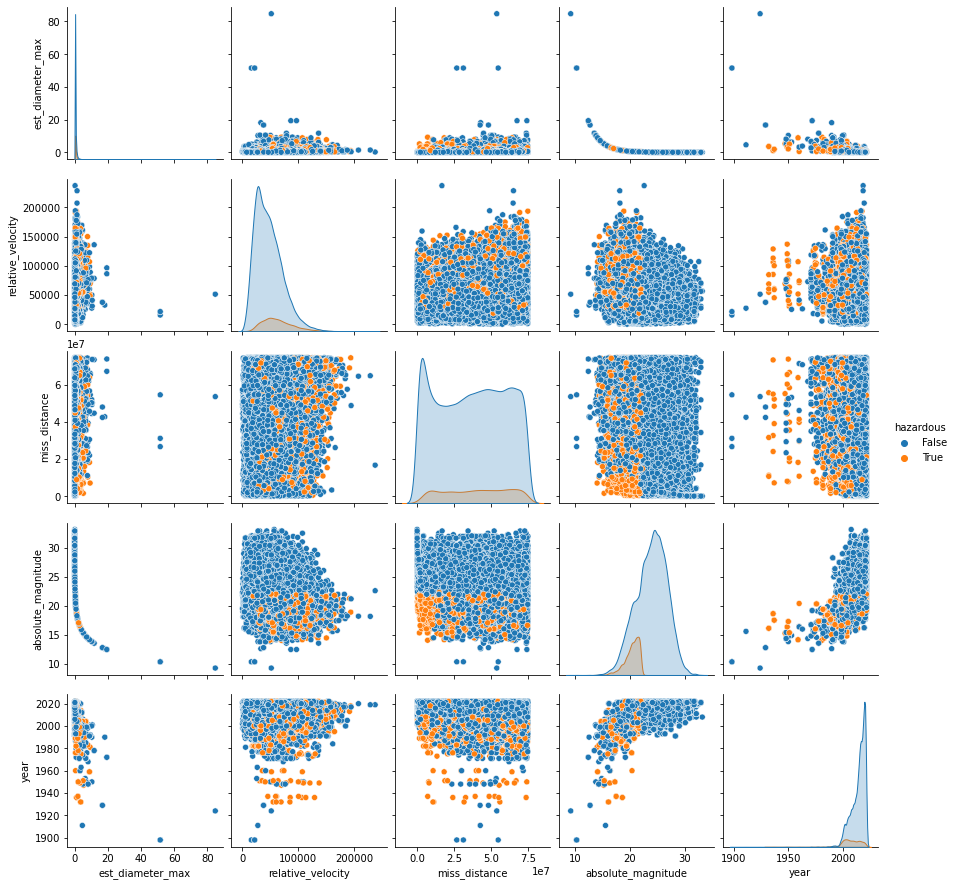

In [32]:
sns.pairplot(df[num_cols+['hazardous']],hue = 'hazardous')

In [33]:
num_cols= ['est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude','year']

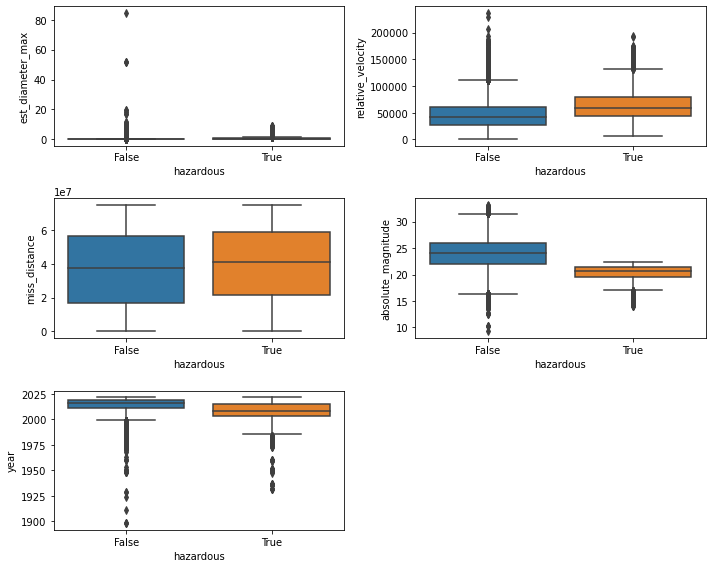

In [34]:
#Making subplots for multiple boxplots and comparing with our target variable
rows=3
cols=2
count=1
plt.rcParams['figure.figsize']=[10,8]
for i in num_cols:
    plt.subplot(rows,cols,count)
    sns.boxplot(x='hazardous',y=i,data=df)
    count+=1
    
plt.tight_layout()
plt.show()

Now our aim is to create classification model to predict whether or not an asteroid is considered hazardous.

## Feature Engineering

In [35]:
#Dropping more unnecessary columns as they have no effect on hazardous

df.drop(columns=['id','name'],inplace=True)

In [36]:
#Replacing True with 1 and false with 0 in hazardous

df['hazardous'].replace(to_replace=[True,False],value=[1,0],inplace=True)

In [38]:
df.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
0,2.679415,13569.249224,5.483974e+07,16.73,0,2000
1,0.594347,73588.726663,6.143813e+07,20.00,1,2005
2,1.614507,114258.692129,4.979872e+07,17.83,0,2015
3,0.215794,24764.303138,2.543497e+07,22.20,0,2012
4,0.570217,42737.733765,4.627557e+07,20.09,1,2014


In [39]:
# dropping year column as it has no effect on hazardous
df.drop(columns='year',inplace=True)

In [40]:
df.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.594347,73588.726663,6.143813e+07,20.00,1
2,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.570217,42737.733765,4.627557e+07,20.09,1


## Model Building

### Splitting and scaling of Data

In [41]:
#Splitting the data

from sklearn.model_selection import train_test_split
X = df.drop(columns='hazardous')
Y=df.loc[:,'hazardous']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train)) # Scaling the train data
X_test_scaled=pd.DataFrame(sc.transform(X_test)) # scaling of test data

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model

model_lg=LogisticRegression() 
model_lg.fit(X_train_scaled,Y_train)# Training the model


LogisticRegression()

In [44]:
#Predictions made

predict_train=model_lg.predict(X_train_scaled)
predict_test=model_lg.predict(X_test_scaled)

In [45]:
# Accuracy Calculation

acc_train=accuracy_score(predict_train,Y_train)
acc_test=accuracy_score(predict_test,Y_test)

In [46]:
print('Accuracy of predictions on Train set:',round(acc_train*100,2),'%')
print('Accuracy of predictions on Test set:',round(acc_test*100,2),'%')

Accuracy of predictions on Train set: 90.21 %
Accuracy of predictions on Test set: 90.25 %


### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier() 
model_rf.fit(X_train_scaled,Y_train)# Training the model

RandomForestClassifier()

In [48]:
#Predictions made

predict_train=model_rf.predict(X_train_scaled)
predict_test=model_rf.predict(X_test_scaled)

In [49]:
#accuracy calculation

acc_train=accuracy_score(predict_train,Y_train)
acc_test=accuracy_score(predict_test,Y_test)

In [50]:
print('Accuracy of predictions on Train set:',round(acc_train*100,2),'%')
print('Accuracy of predictions on Test set:',round(acc_test*100,2),'%')

Accuracy of predictions on Train set: 100.0 %
Accuracy of predictions on Test set: 91.77 %


### Decision Tree Classifier

In [52]:
### Importing Decision Tree Classifier for predictions and accuracy_score to check accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
model_dt=DecisionTreeClassifier() 
model_dt.fit(X_train_scaled,Y_train) # Traing the model


DecisionTreeClassifier()

In [55]:
predictions_train=model_dt.predict(X_train_scaled) # Predicting for train set
acc_train=accuracy_score(Y_train,predictions_train) # Calculating accuracy

In [57]:
predictions_test=model_dt.predict(X_test_scaled) # Predicting on test set
acc_test=accuracy_score(Y_test,predictions_test) # Calculating accuracy

In [58]:
print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')

Accuracy of predictions on train data: 100.0 %
Accuracy of predictions on test data: 89.47 %
